In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [13]:
import pandas as pd 
import psycopg2 
import pandas.io.sql as sqlio 
from password import db_password
connection = psycopg2.connect(user='postgres', password=db_password, 
host='127.0.0.1',
port='5432', 
database='Startup-Analysis')

In [14]:
sql = "SELECT * FROM startup_alldata"

In [15]:
data = sqlio.read_sql_query(sql,connection)

In [20]:
data

,state_code,year_,vp_gdp,labels,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_angel,has_rounda,has_roundb,has_roundc,has_roundd,avg_participants,is_top500,reached_milestone,founded_first_funding_days_difference,first_last_funding_days_difference
0,CA,2007,1.9,1,2007,2.2493,3.0027,4.6685,6.7041,3,...,1,0,0,0,0,1.0000,0,1,821,275
1,CA,2000,7.7,1,2000,5.1260,9.9973,7.0055,7.0055,9,...,0,0,1,1,1,4.7500,1,1,1871,1778
2,CA,2009,3.2,1,2009,1.0329,1.0329,1.4575,2.2055,5,...,0,1,0,0,0,4.0000,1,1,377,0
3,CA,2002,1.8,1,2002,3.1315,5.3151,6.0027,6.0027,5,...,0,0,1,1,1,3.3333,1,1,1143,797
4,CA,2010,2.0,0,2010,0.0000,1.6685,0.0384,0.0384,2,...,1,0,0,0,0,1.0000,1,1,0,609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,WA,2000,0.7,1,2000,5.6301,8.7589,8.5041,8.7589,9,...,0,0,0,1,1,5.6000,1,1,2055,1142
904,CA,2009,3.2,1,2009,0.5178,0.5178,0.5808,4.5260,9,...,0,1,0,0,0,6.0000,1,1,189,0
905,CA,1999,7.2,0,1999,8.4959,8.4959,9.0055,9.0055,5,...,0,0,0,0,1,8.0000,1,1,3101,0
906,CA,2009,3.2,1,2009,0.7589,2.8329,0.7589,3.8356,12,...,0,1,1,0,0,1.0000,1,1,277,757


In [16]:

data["age_first_milestone_year"] = data["age_first_milestone_year"].fillna(value=0)
data["age_last_milestone_year"] = data["age_last_milestone_year"].fillna(value=0)

In [17]:
X = data.drop("labels", "", axis= 1)
y = data["labels"]

In [18]:
#### Create train and transform data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
### Scale the data 
scaler = StandardScaler()

# fit the data
X_scaler = scaler.fit(X_train)

# Transform data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'CA'

In [ ]:
### Create 2 models without PCA

#Start with logistic regression 
model = LogisticRegression(solver="lbfgs", random_state=42)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [ ]:
# print Scores
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.7575757575757576
[[ 49  36]
 [ 20 126]]
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        85
           1       0.78      0.86      0.82       146

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.8138528138528138
[[ 50  35]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70        85
           1       0.80      0.95      0.87       146

    accuracy                           0.81       231
   macro avg       0.83      0.77      0.78       231
weighted avg       0.82      0.81      0.80       231

6.429417190005267


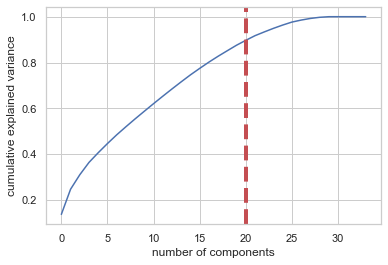

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.136897,0.136897
1,0.246626,0.109729
2,0.309848,0.063222
3,0.363830,0.053982
4,0.406120,0.042290
5,0.446112,0.039992
6,0.484111,0.037999
7,0.519461,0.035350
8,0.553890,0.034430
9,0.587272,0.033382


In [ ]:
#### Create same 2 models with PCA transformation
pca_test = PCA(n_components=34)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
pca_df.head(10)

In [ ]:
pca = PCA(n_components= 20)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:
rf = RandomForestClassifier(n_estimators= 200)


In [ ]:
rf.fit(X_train_scaled_pca, y_train)
y_pred= rf.predict(X_test_scaled_pca)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.7272727272727273
[[ 42  43]
 [ 20 126]]
              precision    recall  f1-score   support

           0       0.68      0.49      0.57        85
           1       0.75      0.86      0.80       146

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

9.419815132332776


In [ ]:
#Logistic Regression
log_model = LogisticRegression(random_state=42)

In [ ]:
log_model.fit(X_train_scaled_pca, y_train)
predictions = log_model.predict(X_test_scaled_pca)

In [ ]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(log_loss(y_test, predictions))

0.7575757575757576
[[ 50  35]
 [ 21 125]]
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        85
           1       0.78      0.86      0.82       146

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

8.373157852922317


In [ ]:
import tensorflow as tf

In [ ]:
nn_model = tf.keras.models.Sequential()

In [ ]:
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=34))
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=30, activation="tanh"))
nn_model.add(tf.keras.layers.Dropout(0.5))
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 80)                2800      
                                                                 
 dense_24 (Dense)            (None, 50)                4050      
                                                                 
 dense_25 (Dense)            (None, 30)                1530      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_26 (Dense)            (None, 20)                620       
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
Total params: 9,021
Trainable params: 9,021
Non-traina

In [ ]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 3ms/step - loss: 0.6447 - accuracy: 0.6460
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7095
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7428
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.7645
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.7630
Epoch 6/500
22/22 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7803
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7803
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8020
Epoch 9/500
22/22 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.8150
Epoch 10/500
22/22 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8150
Epoch 11/

<AxesSubplot:>

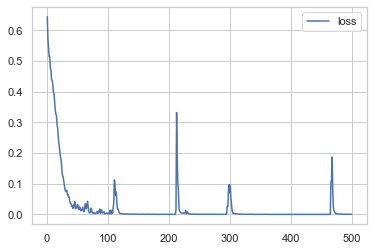

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

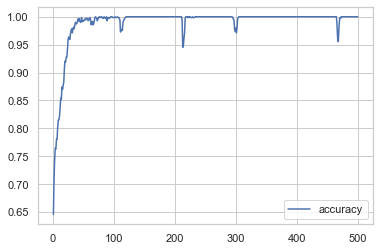

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 1.4052 - accuracy: 0.7403 - 38ms/epoch - 5ms/step
Loss: 1.4051733016967773, Accuracy: 0.7402597665786743


In [ ]:
"""The first random forest looks like the best option, the NN is overffiting so we are not going to use it like that, looking at the labels it 
appears to need a undersampling metodology so we are going to use a Random Undersampling"""

'The first random forest looks like the best option, the NN is overffiting so we are not going to use it like that, looking at the labels it \nappears to need a undersampling metodology so we are going to use a Random Undersampling'

In [ ]:
## New resample
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [ ]:
## initializing random forest
rf_ = RandomForestClassifier(n_estimators= 200)

In [ ]:
## fitting and predicting
rf_.fit(X_resampled, y_resampled)
y_pred = rf_.predict(X_test_scaled)

In [ ]:
### looking accuracy
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(log_loss(y_test, y_pred))
"""got worse precission but better recall, f1-score worse so this is not the solution"""

0.7489177489177489
[[ 62  23]
 [ 35 111]]
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        85
           1       0.83      0.76      0.79       146

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.75      0.75       231

8.672153340457637


'got worse precission but better recall, f1-score worse so this is not the solution'

In [ ]:
### creating a rf function
def rf_model(X,y,n_estimators):
    model = RandomForestClassifier(n_estimators=n_estimators)
    ### create split data
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report= classification_report(y_test,predictions)
    return report



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.combine import SMOTEENN

In [ ]:
## create oversampler function
def rf_model(X,y,model):
    model = model(n_estimators=200)
    ### create split data
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    over_sampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = over_sampler.fit_resample(X_train,y_train)
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    report= classification_report_imbalanced(y_test,predictions)
    accuracy = accuracy_score(y_test,predictions)
    return print(report), print(accuracy)

In [ ]:
rf_model(X,y, BalancedRandomForestClassifier)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.62      0.91      0.69      0.75      0.55        82
          1       0.81      0.91      0.62      0.86      0.75      0.58       149

avg / total       0.80      0.81      0.72      0.80      0.75      0.57       231

0.8051948051948052


(None, None)

In [ ]:
rf_model(X,y,EasyEnsembleClassifier)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.61      0.62      0.77      0.62      0.69      0.47        85
          1       0.78      0.77      0.62      0.77      0.69      0.49       146

avg / total       0.72      0.71      0.68      0.71      0.69      0.48       231

0.7142857142857143


(None, None)

In [ ]:
## create oversampler function
estimator = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
def rf_model(X,y,model):

    model = model(n_estimators=1000)
    ### create split data
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    smote = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    report= classification_report(y_test,predictions)
    accuracy = accuracy_score(y_test,predictions)
    return print(report), print(f'the accuracy for {model} is {accuracy}')

In [ ]:

rf_model(X,y, RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.49      0.60      0.54        68
           1       0.82      0.74      0.78       163

    accuracy                           0.70       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.72      0.70      0.71       231

the accuracy for RandomForestClassifier(n_estimators=1000) is 0.7012987012987013


(None, None)

In [ ]:
rf_model(X,y,EasyEnsembleClassifier)

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        78
           1       0.78      0.82      0.80       153

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231

the accuracy for EasyEnsembleClassifier(n_estimators=1000) is 0.7229437229437229


(None, None)

In [ ]:
rf_model(X,y, BalancedRandomForestClassifier)

              precision    recall  f1-score   support

           0       0.59      0.60      0.59        80
           1       0.79      0.77      0.78       151

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231

the accuracy for BalancedRandomForestClassifier(n_estimators=1000) is 0.7142857142857143


(None, None)

In [ ]:
rf_model(X,y, RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        85
           1       0.76      0.81      0.78       146

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

the accuracy for RandomForestClassifier(n_estimators=1000) is 0.7142857142857143


(None, None)

In [ ]:
svm_model = SVC(kernel="sigmoid", probability= True)

In [ ]:
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='sigmoid', probability=True)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.7619047619047619

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67        85
           1       0.81      0.82      0.81       146

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [ ]:
from sklearn.model_selection import cross_val_score
rf_model(X, y, RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.63      0.62      0.62        87
           1       0.77      0.78      0.78       144

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231

the accuracy for RandomForestClassifier(n_estimators=1000) is 0.7186147186147186


(None, None)